# Desafio Módulo 1 - Bootcamp Alura Data Science Aplicada 2

## Antonio Drago Caetano
https://www.linkedin.com/in/antoniodragoc/

https://github.com/dragoc1

### Pelos dados mais 

## Objetivos

### Buscar entender o comportamento da doença ao longo do ano de 2020 e para o ano de 2021.
### Como está a situação do país neste momento em que vivemos uma segunda onda da Covid-19.

## Análises
- Número de casos;
- Número de mortes;
- Evolução de novos casos.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
import datetime

from datetime import datetime

#ignorar os avisos do python
warnings.filterwarnings('ignore')
# Fomatação do Pandas
#pd.options.display.float_format='{:.2f}'.format


# Definindo funções


In [2]:
def checa_na(data):

    # checando a quantidade de valores nulos
    null_sum = data.isnull().sum() #Criando as colunas
    total = null_sum.sort_values(ascending=False) #Número total
    percent = ( ((null_sum / len(data.index))*100).round(2) ).sort_values(ascending=False)
    
    # Criando colunas de valores totais e valores missing
    df_NA = pd.concat([total, percent], axis=1, keys=['Number of NA', 'Percent NA'])
    
    # Removendo linhas que não possuem valores faltantes
    #df_NA = df_NA[ (df_NA.T != 0).any() ]
    
    return df_NA

In [3]:
def coluna_estados(data):
    estados = {
    'RO' : '11',
    'AC' : '12',
    'AM' : '13',
    'RR' : '14',
    'PA' : '15',
    'AP' : '16',
    'TO' : '17',
    'MA' : '21',
    'PI' : '22',
    'CE' : '23',
    'RN' : '24',
    'PB' : '25',
    'PE' : '26',
    'AL' : '27',
    'SE' : '28',
    'BA' : '29',
    'MG' : '31',
    'ES' : '32',
    'RJ' : '33',
    'SP' : '35',
    'PR' : '41',
    'SC' : '42',
    'RS' : '43',
    'MS' : '50',
    'MT' : '51',
    'GO' : '52',
    'DF' : '53'}

    a = data['city_ibge_code'].astype(str).str[:2]

    regiao = a.replace(estados,regex=True)

    data.insert(value = regiao, column = 'Estado', loc = 0)

In [4]:
def coluna_regiao(data):
    a = data['city_ibge_code'].astype(str).str[0]
    # Criando o dicionário com chave e valor, onde os valores atuais serão substituidos pelas Regiões 
    dict_regiao = {'1':'Norte','2':'Nordeste','3':'Sudeste','4':'Centro Oeste','5':'Sul'}
    regiao = a.replace(dict_regiao,regex=True)

    data.insert(value = regiao, column = 'Região', loc = 1)

In [5]:
def plot_semana(data,y,hue,titulo):
    # Parâmetros
    data = data.sort_values(by=['last_available_confirmed'], ascending=False)
    x = 'epidemiological_week'
    y = y
    hue = hue
    title = titulo + ' (Covid-19) - Atualizado: {}'.format(df['last_available_date'].max())
    x_label = 'Semana epidemiológica'
    y_label = 'Casos confirmados'

    # criando gráfico
    ax = sns.lineplot(
        data=data,
        x=x,
        y=y,
        hue = hue,
        palette = "rocket",
        ci = None)

    # Plot
    ax.figure.set_size_inches((16, 9))
    ax.set_title(title, fontsize = 20)
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xlabel(x_label, fontsize= 14)
    ax.set_ylabel(y_label, fontsize = 14)
    ax.grid(color='grey', linestyle='-.', linewidth=0.5)
    plt.vlines(
        x = 54, 
        ymin = 0, 
        ymax = data[y].max(),
        ls = '--', color ='black', alpha = 0.4)
    plt.text(53,data[y].max()/2,'2021',rotation=90, fontsize = 12,color ='black', alpha = 0.4)
    ax;

In [6]:
def organiza_week(data):
    aux_2020 = data[data['epidemiological_week'].astype(str).str[:4]=='2020']
    aux_2020['epidemiological_week'] = aux_2020['epidemiological_week'].astype(str).str[4:].astype('int64')

    aux_2021 = data[data['epidemiological_week'].astype(str).str[:4]=='2021']
    aux_2021['epidemiological_week'] = aux_2021['epidemiological_week'].astype(str).str[4:].astype('int64')
    aux_2021['epidemiological_week'] = aux_2021['epidemiological_week'] + 53

    aux_concat = aux_2020['epidemiological_week']
    aux_concat = aux_concat.append(aux_2021['epidemiological_week'])

    data = data.sort_values(by = 'epidemiological_week')
    data['epidemiological_week'] = aux_concat
    return data

# Importação dos dados

In [9]:
df = pd.read_csv("./dados/caso_full.csv.gz",compression='gzip',sep = ',', error_bad_lines= False,encoding= 'utf-8', engine = 'python')
df.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,Rio Branco,1200401.0,2020-03-17,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-17,0.0,0,1,city,AC,3,0
1,NaN,12.0,2020-03-17,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0,0,1,state,AC,3,0
2,Rio Branco,1200401.0,2020-03-18,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-18,0.0,0,2,city,AC,0,0
3,NaN,12.0,2020-03-18,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0,0,2,state,AC,0,0
4,Rio Branco,1200401.0,2020-03-19,202012,413418.0,407319.0,False,False,4,0.96754,2020-03-19,0.0,0,3,city,AC,1,0


In [10]:
#df = df[df['city']!='Importados/Indefinidos']
df['state'].value_counts().shape[0]

27

In [11]:
coluna_regiao(df)

In [12]:
checa_na(df)

,Number of NA,Percent NA
last_available_confirmed_per_100k_inhabitants,23332,1.10
city,11830,0.56
city_ibge_code,7813,0.37
estimated_population,7813,0.37
estimated_population_2019,7813,0.37
last_available_death_rate,0,0.00
new_confirmed,0,0.00
state,0,0.00
place_type,0,0.00
order_for_place,0,0.00


# Criando Dataframe separado por região

In [13]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html
# agrupando o dataset por região, estado e semana epidemiológica
df_regiao = df.query("place_type == 'state'").groupby(by=['Região','state', 'epidemiological_week']).agg({'order_for_place' : 'max', 'last_available_confirmed' : 'max', 'last_available_deaths' : 'max', 'estimated_population' : 'max'})

df_regiao.reset_index(drop=False, inplace=True)
# agrupando o dataset por região e semana epidemiológica
df_regiao = df_regiao.groupby(by=['Região', 'epidemiological_week']).agg({'last_available_confirmed' : 'sum', 'last_available_deaths' : 'sum', 'estimated_population' : 'sum'})
df_regiao.reset_index(drop=False, inplace=True)
df_regiao.head()

,Região,epidemiological_week,last_available_confirmed,last_available_deaths,estimated_population
0,Centro Oeste,202011,15,0,30192315.0
1,Centro Oeste,202012,169,0,30192315.0
2,Centro Oeste,202013,521,5,30192315.0
3,Centro Oeste,202014,1175,24,30192315.0
4,Centro Oeste,202015,2073,64,30192315.0


In [14]:
df_regiao = organiza_week(df_regiao)
df_regiao.iloc[[*range(3),*range(-3,0)]]

,Região,epidemiological_week,last_available_confirmed,last_available_deaths,estimated_population
193,Sudeste,9,2,0,46289333.0
259,Sul,10,1,0,3055149.0
194,Sudeste,10,16,0,67719574.0
63,Centro Oeste,74,3072543,67904,30192315.0
258,Sudeste,74,6027460,206933,89012240.0
323,Sul,74,1670166,42320,16504303.0


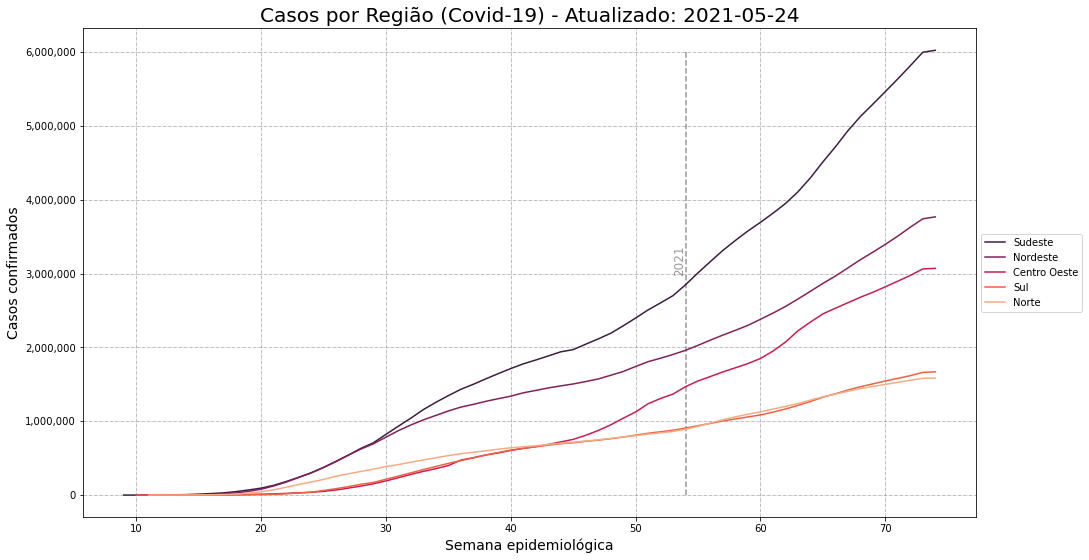

In [15]:
plot_semana(df_regiao, 'last_available_confirmed', 'Região','Casos por Região')

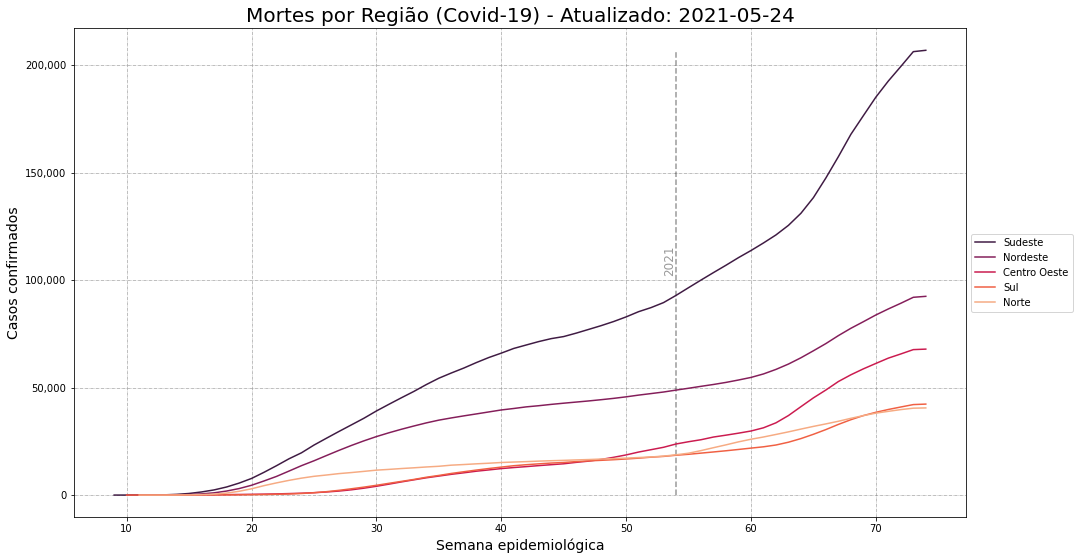

In [16]:
plot_semana(df_regiao, 'last_available_deaths', 'Região','Mortes por Região')

# Dados para o Brasil

In [17]:
# agrupando o dataset por região e semana epidemiológica
df_br = df_regiao.groupby(by=['epidemiological_week']).agg({'last_available_confirmed' : 'sum', 'last_available_deaths' : 'sum', 'estimated_population' : 'sum'})
df_br.reset_index(drop=False, inplace=True)
df_br['Região'] = 'Brasil'
#df_br = organiza_week(df_br)
df_br.iloc[[*range(3),*range(-3,0)]]

,epidemiological_week,last_available_confirmed,last_available_deaths,estimated_population,Região
0,9,2,0,46289333.0,Brasil
1,10,19,0,85705357.0,Brasil
2,11,136,0,174181414.0,Brasil
63,72,15599145,435039,211755692.0,Brasil
64,73,16055289,448499,211755692.0,Brasil
65,74,16126791,450165,211755692.0,Brasil


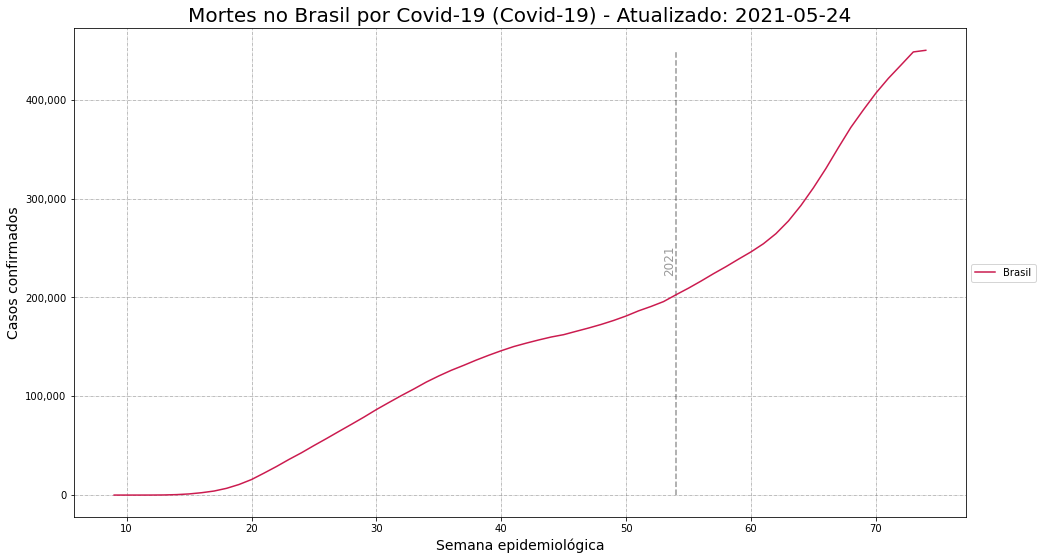

In [18]:
plot_semana(df_br, 'last_available_deaths', 'Região','Mortes no Brasil por Covid-19')

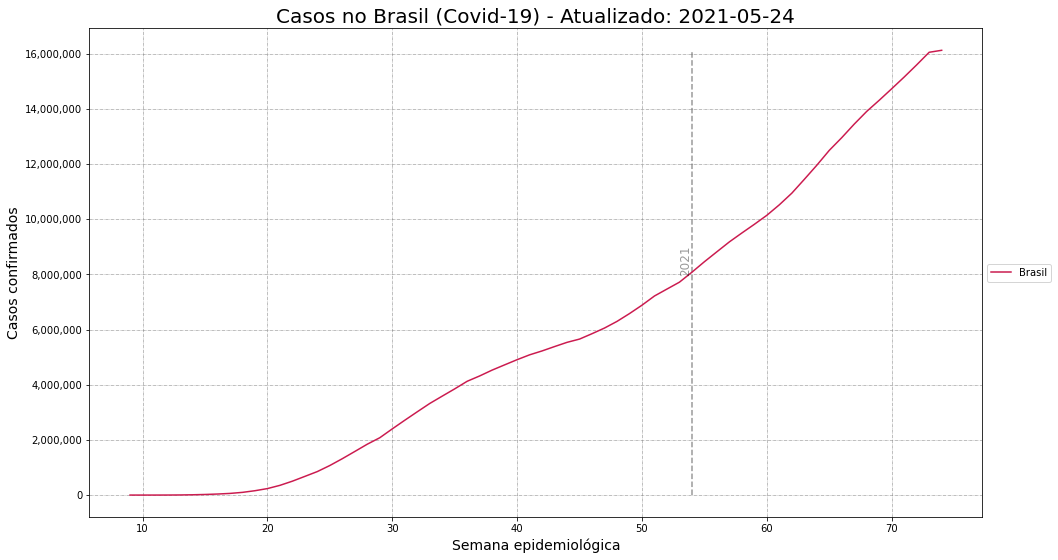

In [19]:
plot_semana(df_br, 'last_available_confirmed', 'Região','Casos no Brasil')

# Dataset por Estado

In [20]:
# agrupando o dataset por região, estado e semana epidemiológica
df_estados = df.query("place_type == 'state' ").groupby(by=['Região','state', 'epidemiological_week']).agg({'order_for_place' : 'max', 'last_available_confirmed' : 'max', 'last_available_deaths' : 'max', 'estimated_population' : 'max','new_confirmed' : 'sum', 'new_deaths' : 'max','date':'max'})
df_estados.reset_index(drop=False, inplace=True)
df_estados = organiza_week(df_estados)

In [21]:
df_estados.head()

,Região,state,epidemiological_week,order_for_place,last_available_confirmed,last_available_deaths,estimated_population,new_confirmed,new_deaths,date
1402,Sudeste,SP,9,5,2,0,46289333.0,2,0,2020-02-29
1468,Sul,DF,10,1,1,0,3055149.0,1,0,2020-03-07
1337,Sudeste,RJ,10,3,2,0,17366189.0,2,0,2020-03-07
1208,Sudeste,ES,10,3,1,0,4064052.0,1,0,2020-03-07
256,Nordeste,BA,10,2,2,0,14930634.0,2,0,2020-03-07


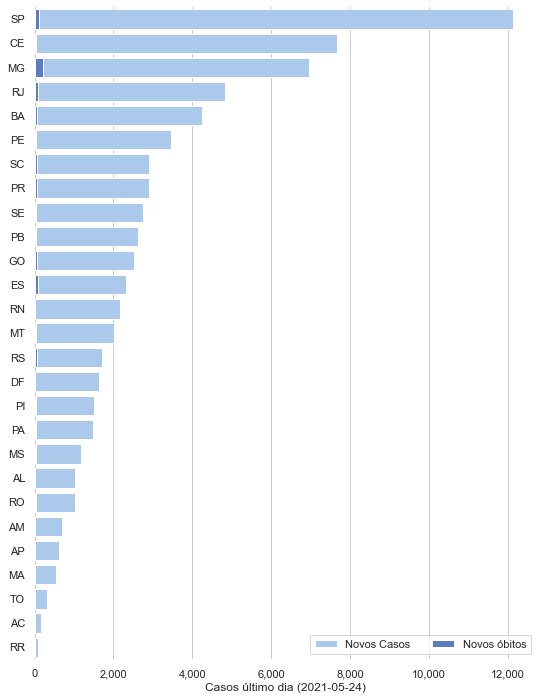

In [22]:
# https://seaborn.pydata.org/examples/part_whole_bars.html?highlight=bar
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(9, 12))

# Plot dos novos casos confirmados no dia mais recente
sns.set_color_codes("pastel")
sns.barplot(
    x="new_confirmed", 
    y="state", 
    data=df_estados[df_estados['date']==df_estados['date'].max()].sort_values('new_confirmed', ascending = False),
    label="Novos Casos", 
    color="b")

# Plot dos novos óbitos confirmados no dia mais recente
sns.set_color_codes("muted")
sns.barplot(
    x="new_deaths",
    y="state", 
    data=df_estados[df_estados['date']==df_estados['date'].max()].sort_values('new_confirmed', ascending = False),
    label="Novos óbitos", 
    color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(
    ylabel="",
    xlabel="Casos último dia ({})".format(df_estados['date'].max()))       
       
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
sns.despine(left=True, bottom=True)

# Análise para a Região Sudeste

In [23]:
df_sudeste = df_estados[df_estados['Região'] == 'Sudeste']
df_sudeste.iloc[[*range(3),*range(-3,0)]]

,Região,state,epidemiological_week,order_for_place,last_available_confirmed,last_available_deaths,estimated_population,new_confirmed,new_deaths,date
1402,Sudeste,SP,9,5,2,0,46289333.0,2,0,2020-02-29
1337,Sudeste,RJ,10,3,2,0,17366189.0,2,0,2020-03-07
1208,Sudeste,ES,10,3,1,0,4064052.0,1,0,2020-03-07
1467,Sudeste,SP,74,455,3192727,107677,46289333.0,12132,117,2021-05-24
1272,Sudeste,ES,74,446,471566,10589,4064052.0,2318,77,2021-05-24
1401,Sudeste,RJ,74,446,844442,49539,17366189.0,4819,77,2021-05-24


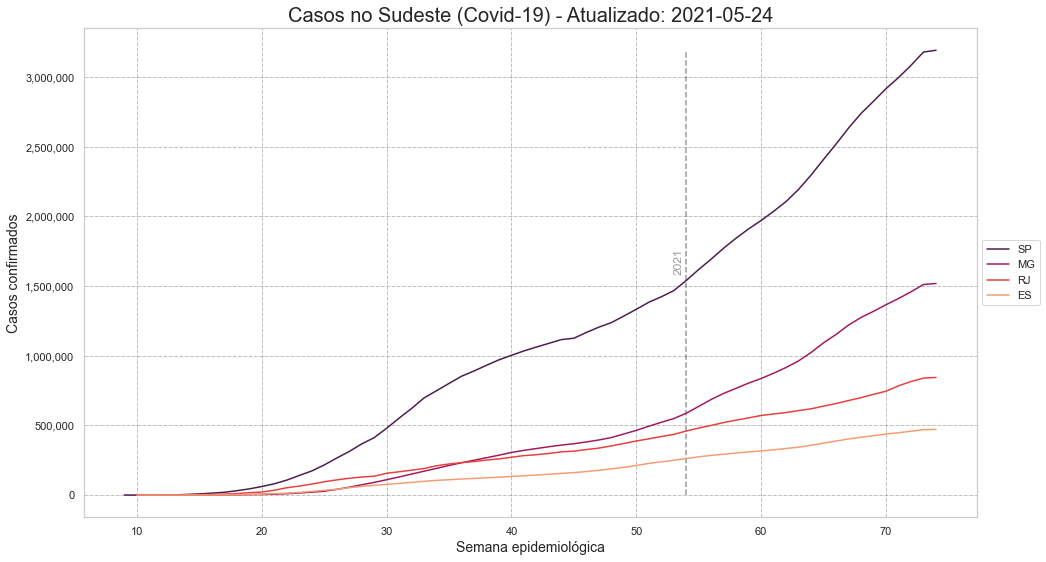

In [24]:
plot_semana(df_sudeste, 'last_available_confirmed', 'state','Casos no Sudeste')

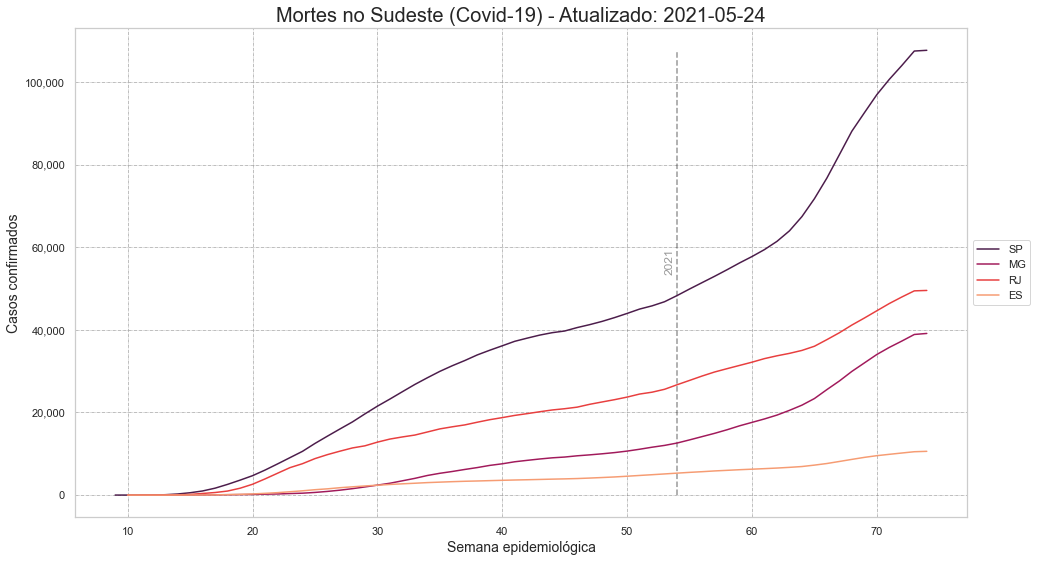

In [25]:
plot_semana(df_sudeste, 'last_available_deaths', 'state','Mortes no Sudeste')

# 5 Estados com maiores números de Casos de COVID-19

In [26]:
top5 = df_estados[df_estados['epidemiological_week'] == df_estados['epidemiological_week'].max()].sort_values(by = 'last_available_confirmed',ascending= False).head(5)
top5_estados = top5['state'].to_list()

In [27]:
# agrupando o dataset por região, estado e semana epidemiológica
df_top5 = df_estados.query("state == @top5_estados").groupby(by=['Região','state', 'epidemiological_week']).agg({'order_for_place' : 'max', 'last_available_confirmed' : 'max', 'last_available_deaths' : 'max', 'estimated_population' : 'max'})
df_top5.reset_index(drop=False, inplace=True)
#df_top5 = organiza_week(df_top5)
df_top5.iloc[[*range(3),*range(-3,0)]]

,Região,state,epidemiological_week,order_for_place,last_available_confirmed,last_available_deaths,estimated_population
0,Centro Oeste,PR,11,3,6,0,11516840.0
1,Centro Oeste,PR,12,10,43,0,11516840.0
2,Centro Oeste,PR,13,17,137,2,11516840.0
320,Sudeste,SP,72,446,3085290,103995,46289333.0
321,Sudeste,SP,73,453,3180595,107497,46289333.0
322,Sudeste,SP,74,455,3192727,107677,46289333.0


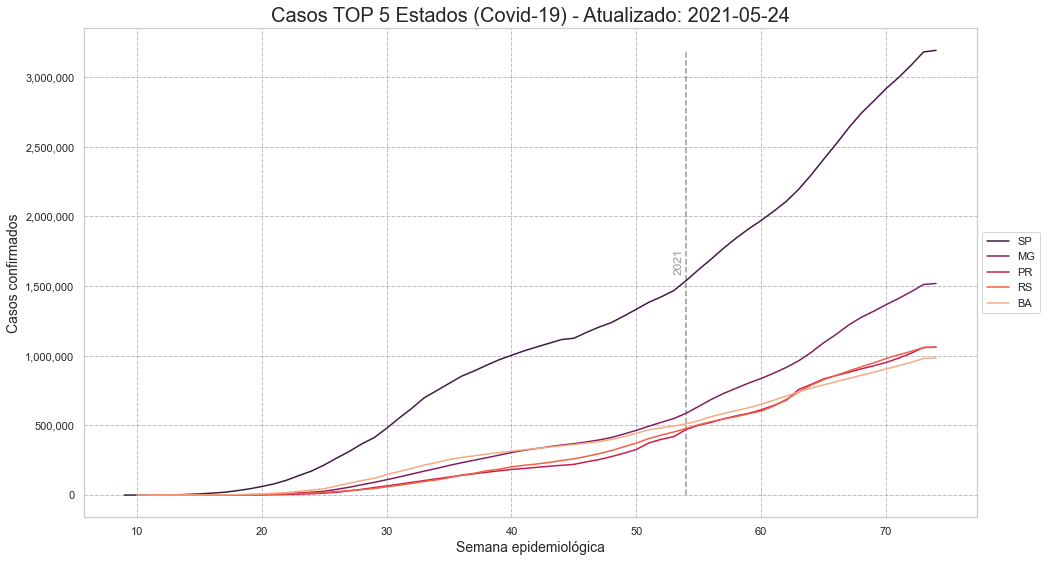

In [28]:
plot_semana(df_top5, 'last_available_confirmed', 'state','Casos TOP 5 Estados')

# 5 Estados com maiores números de caso excluindo São Paulo

In [29]:
top5 = df_estados[df_estados['epidemiological_week'] == df_estados['epidemiological_week'].max()].sort_values(by = 'last_available_confirmed',ascending= False)[1:6]
top5_estados = top5['state'].to_list()

In [30]:
# agrupando o dataset por região, estado e semana epidemiológica
df_top5ssp = df_estados.query("state == @top5_estados").groupby(by=['Região','state', 'epidemiological_week']).agg({'order_for_place' : 'max', 'last_available_confirmed' : 'max', 'last_available_deaths' : 'max', 'estimated_population' : 'max'})
df_top5ssp.reset_index(drop=False, inplace=True)
#df_top5 = organiza_week(df_top5)
df_top5ssp.iloc[[*range(3),*range(-3,0)]]

,Região,state,epidemiological_week,order_for_place,last_available_confirmed,last_available_deaths,estimated_population
0,Centro Oeste,PR,11,3,6,0,11516840.0
1,Centro Oeste,PR,12,10,43,0,11516840.0
2,Centro Oeste,PR,13,17,137,2,11516840.0
318,Sudeste,MG,72,434,1459402,37283,21292666.0
319,Sudeste,MG,73,441,1511756,38878,21292666.0
320,Sudeste,MG,74,443,1518725,39128,21292666.0


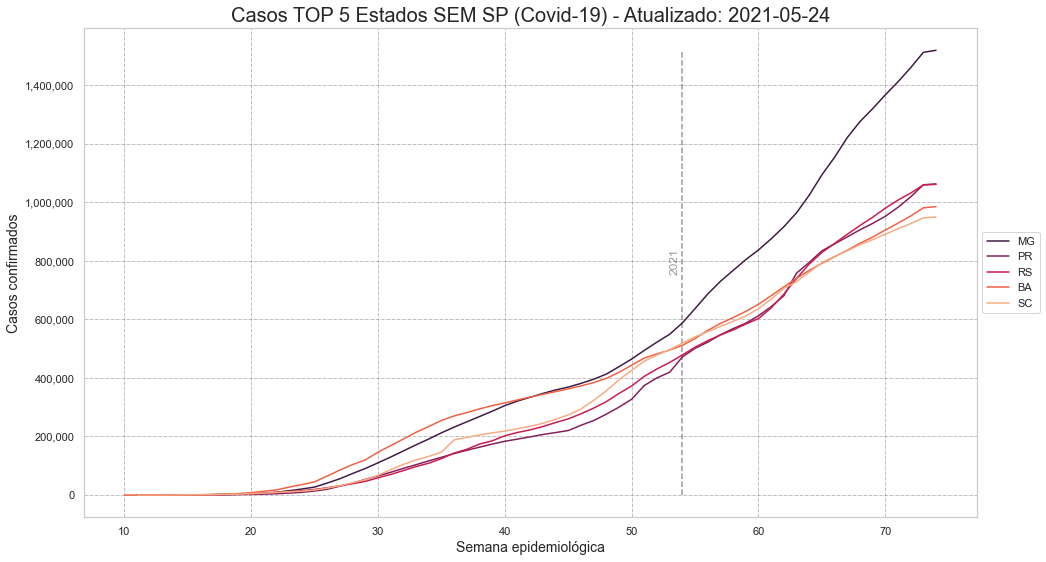

In [31]:
plot_semana(df_top5ssp, 'last_available_confirmed', 'state','Casos TOP 5 Estados SEM SP')